In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wecode=pd.read_csv("/content/drive/MyDrive/wecode.csv",engine='python')
score=pd.read_csv("/content/drive/MyDrive/score_training.csv",engine='python')

In [ ]:
wecode.info() #thông tin file wecode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [ ]:
score.info() #thông tin file score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


#**Lọc dữ liệu từ file WECODE**

In [111]:
# tạo DF mới với các cột cần thiết
new_data = pd.DataFrame({'user_id': wecode['user_id'],
                         'sum_problems': wecode['is_final'],
                         'sum_submits': 1,
                         'sum_pre_score': wecode['pre_score']==1000,
                         'pre_score':wecode['pre_score'],})

In [114]:
# group theo id
new_data = new_data.groupby('user_id').sum()
new_data

,sum_problems,sum_submits,sum_pre_score,pre_score
user_id,,,,
1,2,2,0,10000
4,38,54,0,466000
5,5,6,0,30000
6,88,130,0,965637
7,2,5,0,18843
...,...,...,...,...
1860,48,76,3,405440
1862,6,12,0,40000
1864,63,187,6,563292


#**Lọc dữ liệu file score**

In [115]:
temp=pd.DataFrame({'user_id':score['id'],'CK':score['CK']})
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  975 non-null    int64 
 1   CK       974 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB


In [116]:
temp = temp.where(temp.CK != '\xa0') # Xóa ' '
temp = temp.where(temp.CK == temp.CK) # Xóa nan
temp

,user_id,CK
0,22.0,8.5
1,24.0,9.5
2,27.0,10
3,28.0,9.5
4,29.0,8.5
...,...,...
970,1857.0,4
971,1859.0,1.5
972,1862.0,7.5
973,1865.0,7.5


In [117]:
data=pd.merge(new_data,temp,how='inner',on='user_id')
data

,user_id,sum_problems,sum_submits,sum_pre_score,pre_score,CK
0,24,77,164,4,1031674,9.5
1,27,5,13,3,52000,10
2,29,80,199,2,1225828,8.5
3,34,84,218,11,1206981,6.5
4,35,151,297,3,1809718,4.5
...,...,...,...,...,...,...
801,1856,31,64,6,329074,7.5
802,1857,40,55,0,389000,4
803,1859,30,31,0,39000,1.5
804,1862,6,12,0,40000,7.5


In [118]:
data=data.sort_values(by='CK')

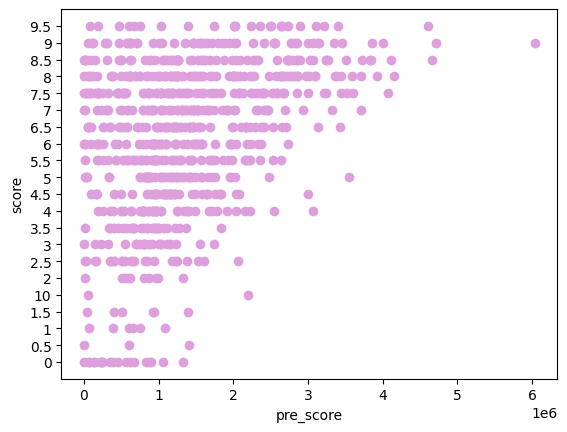

In [119]:
plt.plot(data['pre_score'],data['CK'],'o',color='plum')
plt.xlabel('pre_score')
plt.ylabel('score')
plt.show()

Nhìn vào biểu đồ ta thấy tập trung chủ yếu ở bên trái (pre_score thấp <> điểm cao). Vậy điểm precore không thể phản ánh được chính xác điểm cuối kì các bạn cao hay thấp

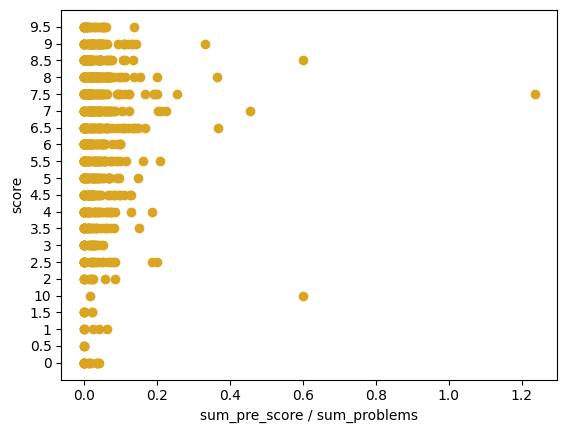

In [91]:

plt.plot(data['sum_pre_score']/data['sum_problems'], data['CK'], 'o',color='goldenrod')
plt.xlabel('sum_pre_score / sum_problems')
plt.ylabel('score')
plt.show()

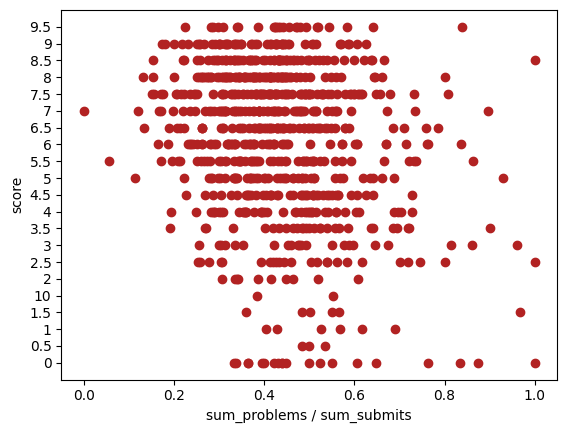

In [123]:
plt.plot(data['sum_problems']/data['sum_submits'], data['CK'] , 'o',color='firebrick')
plt.xlabel('sum_problems / sum_submits')
plt.ylabel('score')
plt.show()


tập trung chủ yếu ở 0.2- 0.8 --> dù submit nhiều hay ít thì điểm cuối kì vẫn có thể cao

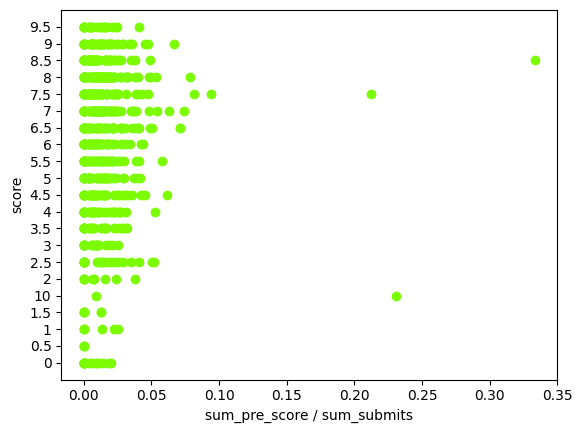

In [95]:
plt.plot(data['sum_pre_score']/data['sum_submits'], data['CK'], 'o',color='lawngreen')
plt.xlabel('sum_pre_score / sum_submits')
plt.ylabel('score')
plt.show()